In [26]:
K=3

In [46]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

## Tạo dữ liệu gồm 1500 điểm hội tụ với K

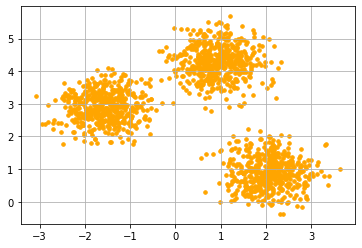

In [52]:
X,_ = make_blobs(n_samples=1500,
               n_features=2,
               centers=K,
               cluster_std=0.5,
               shuffle=True,
               random_state=0)
plt.scatter(X[:,0], X[:,1], c='orange', marker='.', s=50)
plt.grid(); plt.show()


def plot_result(X, y, centers, k, title):
    for i in range(K):
        plt.scatter(X[y==i,0],
                    X[y==i,1],
                    s=50,
                    #c='lightgreen',
                    #marker='s',
                    label='cluster '+ str(i+1))
 
    plt.scatter(centers[:,0],
                    centers[:,1],
                    s=250,
                    marker='x',
                    c='red',
                    label='center')
    plt.title(title)
    plt.legend(); plt.grid(); plt.show()
    

In [39]:
def init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [44]:
def group_data(X, centers):
    y = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        d = X[i] - centers
        d = np.linalg.norm(d, axis=1)
        y[i] = np.argmin(d)

    return y

In [45]:
def update_centers(X, y, k):
    centers = np.zeros((k, X.shape[1]))
    for i in range(k):
        X_i = X[y==i, :]
        centers[i] = np.mean(X_i, axis = 0)
    return centers

In [47]:
def kmeans(X, k):
    centers = init_centers(X, k)
    y = []
    while True:
        y_old = y
        y = group_data(X, centers)
        if np.array_equal(y, y_old):
            break


        centers = update_centers(X, y, k)
    return (centers, y)

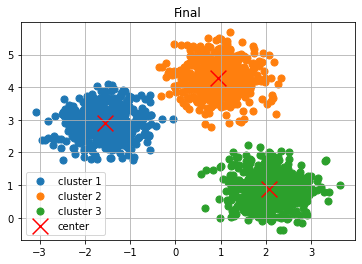

In [53]:
centers, y = kmeans(X, K)
plot_result(X, y, centers, K, 'Final')